In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# print("All packages install successfully")
# print(f"Pands: {pd.__version__}")
# print(f"Numpy: {pd.__version__}")

filepath = "/kaggle/input/tricity-voting-data-2024/tricity voting 2024 presidential - Sheet1 (2).csv"
df = pd.read_csv(filepath)

df.head()


,Town,Precinct,Dem,Rep,Total
0,Batavia,BA-0001,517,303,820
1,Batavia,BA-0002,447,202,649
2,Batavia,BA-0003,517,329,846
3,Batavia,BA-0004,656,435,1091
4,Batavia,BA-0005,700,452,1152


**Overall voting by city**

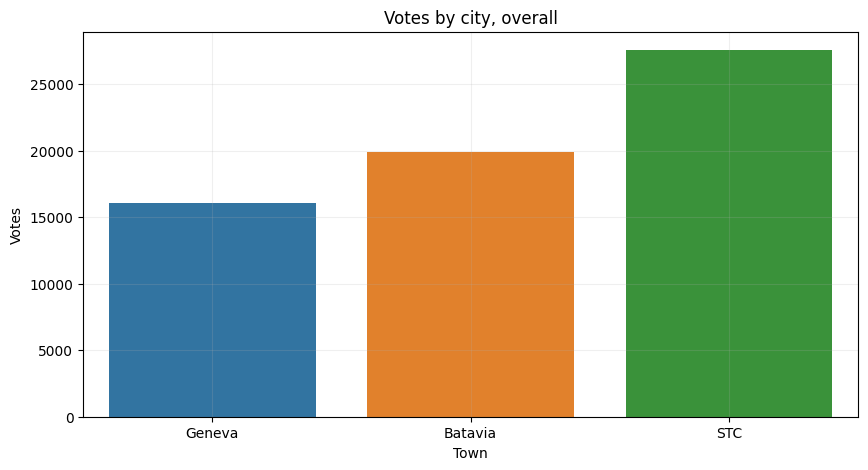

In [19]:
votes_by_city = df.groupby('Town')['Total'].sum().reset_index()
votes_by_city.columns = ['Town', 'Votes']
sorted_votes = votes_by_city.sort_values(by='Votes')


plt.figure(figsize=(10,5))
plt.title('Votes by city, overall')
sns.barplot(data=sorted_votes, x='Town', y='Votes')
plt.grid(alpha=0.2)

**Composition of votes by political party, tri cities**

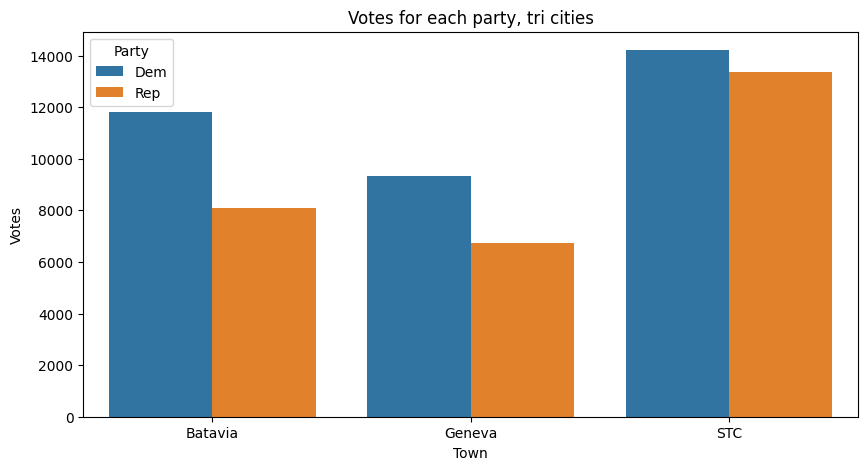

In [61]:
votes_by_party = pd.melt(df, id_vars=['Town'], value_vars=['Dem', 'Rep'])
final_data = votes_by_party.groupby(['Town', 'variable'])['value'].sum().reset_index()
final_data.columns = ['Town', 'Party', 'Votes']


plt.figure(figsize=(10,5))
plt.title('Votes for each party, tri cities')
sns.barplot(data=final_data, x='Town', y='Votes', hue='Party')

plt.show()

**Top precincts by party (% of votes)**

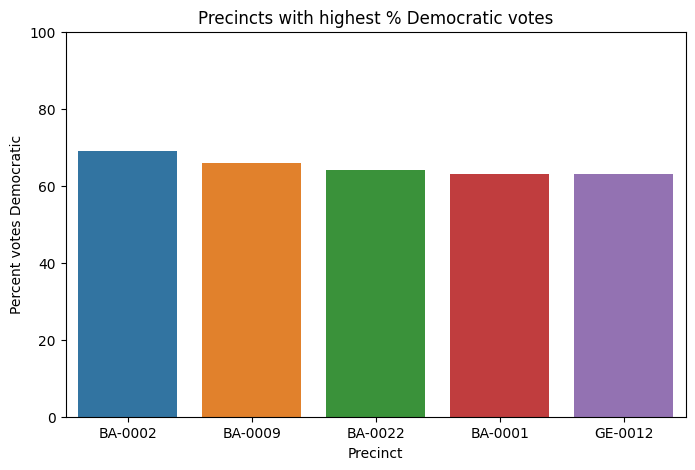

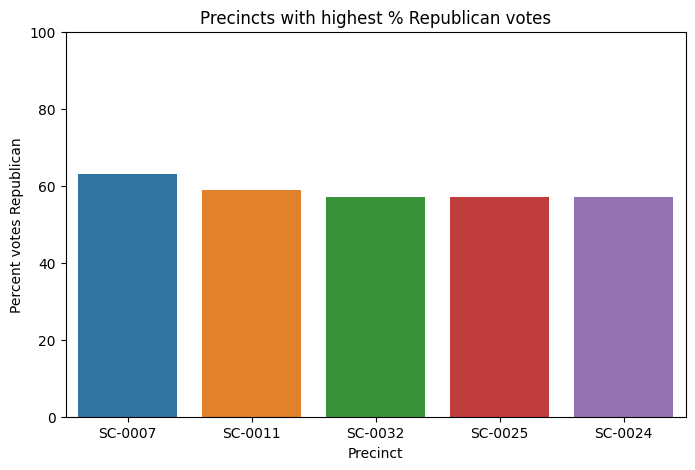

In [62]:
# Add percent columns to the df:
df['Percent_Dem'] = ((df['Dem'] / df['Total']) * 100).round()
df['Percent_Rep'] = ((df['Rep'] / df['Total']) * 100).round()

top_dem_precincts = df.sort_values(by='Percent_Dem', ascending=False).head(5)
top_rep_precincts = df.sort_values(by='Percent_Rep', ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.title('Precincts with highest % Democratic votes')
sns.barplot(data=top_dem_precincts, x='Precinct', y='Percent_Dem')
plt.ylabel('Percent votes Democratic')
plt.ylim(top=100)

plt.figure(figsize=(8,5))
plt.title('Precincts with highest % Republican votes')
sns.barplot(data=top_rep_precincts, x='Precinct', y='Percent_Rep')
plt.ylabel('Percent votes Republican')

plt.ylim(top=100)

plt.show()



**Correlation between precinct size and party affiliation**

* No correlation found!

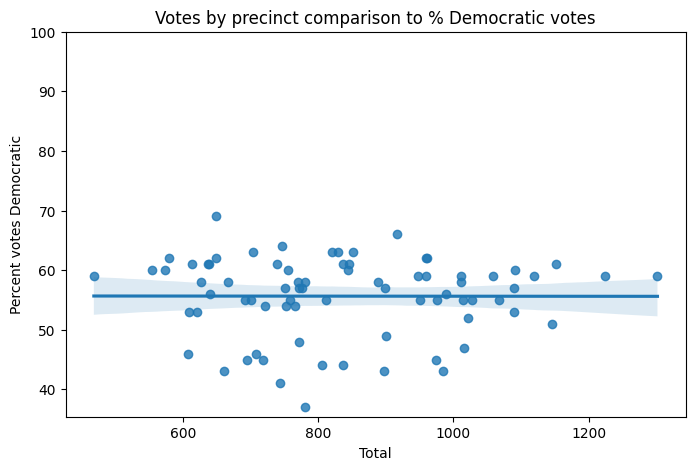

In [64]:
# Add percent columns to the df:
df['Percent_Dem'] = ((df['Dem'] / df['Total']) * 100).round()
df['Percent_Rep'] = ((df['Rep'] / df['Total']) * 100).round()

plt.figure(figsize=(8,5))
plt.title('Votes by precinct comparison to % Democratic votes')
sns.regplot(x=df['Total'], y=df['Percent_Dem'])
plt.ylabel('Percent votes Democratic')

plt.ylim(top=100)

plt.show()